# Lab 08-3: Convolution NN with TensorFlow
## Exercise: Predicting MNIST Digits

Prepare MNIST Dataset

In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the original MNIST dataset
# MNIST dataset contains 60000 training images and 10000 test images of 28x28 pixels
# Each image has a hand-written digit
(X_train_org, y_train_num), (X_test_org, y_test) = tf.keras.datasets.mnist.load_data()

# Digits data has range of [0,255], which often lead too big exponential values
# so make them normal distribution of [0,1] with the sklearn package, or you can just divide them by 255
X_train = tf.cast(X_train_org / 255, dtype=tf.float32)
X_test = tf.cast(X_test_org / 255, dtype=tf.float32)

# Transform Nx1 Y vector to Nx10 answer vector, so that we can perform one-to-all classification
y_train = tf.one_hot(y_train_num, 10)

# Split training dataset into training and validation
X_val = X_train[50000:60000]
y_val = y_train[50000:60000]

X_train = X_train[:50000]
y_train = y_train[:50000]

n_classes = 10

### Convolution NN Definition with Keras Sequential API

In [35]:
# tf.model
model = tf.keras.Sequential([
    ### START CODE HERE ###

    tf.keras.layers.InputLayer(input_shape=(28,28,1)),

    # Layer 1: Conv2D/BN/ReLU/MaxPool
    tf.keras.layers.Conv2D(16, 3, strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),        
    
    tf.keras.layers.Conv2D(32, 3, strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)), 

    # Layer 2: Conv2D/BN/ReLU/GolbalPool
    tf.keras.layers.Conv2D(64, 3, strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    
    # Layer 3: Dense/Softmax
    tf.keras.layers.Dense(10, activation='softmax')

    ### END CODE HERE ###
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_17 (Bat  (None, 28, 28, 16)       64        
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_18 (Bat  (None, 14, 14, 32)      

Training Simple Convolution Neural Network Model (3 layer model)

In [36]:
# compile and train
#opt = tf.keras.optimizers.SGD(learning_rate=0.01)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

results = model.fit(X_train, y_train, batch_size=64, epochs=10, 
                    validation_data=[X_val, y_val], verbose=1)

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4919 - acc: 0.9014 - val_loss: 0.6153 - val_acc: 0.8080
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1250 - acc: 0.9682 - val_loss: 0.1978 - val_acc: 0.9393
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0873 - acc: 0.9766 - val_loss: 0.2195 - val_acc: 0.9320
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0688 - acc: 0.9804 - val_loss: 0.1372 - val_acc: 0.9575
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0573 - acc: 0.9835 - val_loss: 0.1707 - val_acc: 0.9456
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0507 - acc: 0.9852 - val_loss: 0.1260 - val_acc: 0.9608
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0454 - acc: 0.9870 - val_loss: 0.5007 - val_acc: 0.8348
Epoch 8/10
782/782 [==============================] - 4s 5ms/step - loss: 0.

Plot loss and accuracy

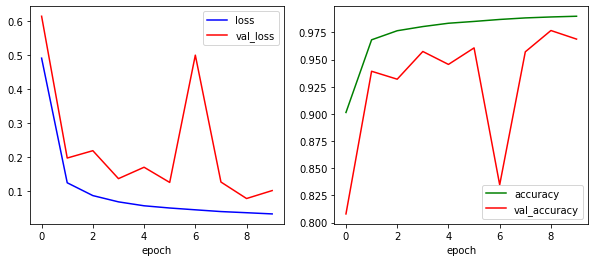

In [37]:
# plot loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(results.history['loss'], 'b-', label='loss')
plt.plot(results.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(results.history['acc'], 'g-', label='accuracy')
plt.plot(results.history['val_acc'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

Evaluate Model Performance

In [38]:
from sklearn.metrics import accuracy_score

y_prob = model.predict(X_test)
y_pred = tf.math.argmax(y_prob, axis=-1)

print(y_test[0:10])
print(y_pred[0:10].numpy())

accuracy_score(y_pred, y_test)

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


0.9682

### Test Model with a Random Sample


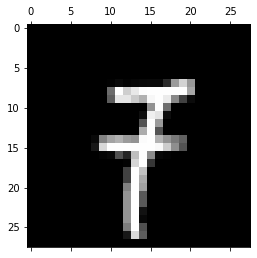

My prediction is 7
Actual number is 7


In [39]:
idx = np.random.randint(X_test.shape[0])
plt.matshow(X_test_org[idx])
plt.gray()
plt.show()

X_in = tf.expand_dims(X_test[idx], 0)

prob = model.predict(X_in)
pred = np.argmax(prob, axis=1)

print('My prediction is ' + str(pred[0]))
print('Actual number is ' + str(y_test[idx]))